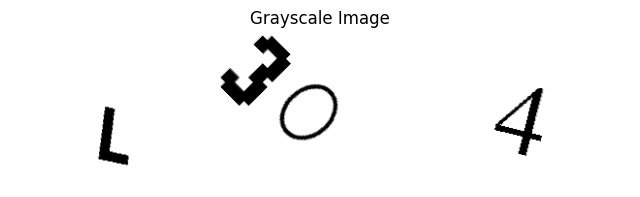

Image size: (640, 160)
Image mode: L


In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the image
image_path = '/home/utn/omul36yx/git/UTN-CAPTCHASOLVER/UTN-CV25-Captcha-Dataset/part2/train/images/000001.png'

# Open the image in grayscale mode ('L')
img = Image.open(image_path).convert('L')

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Print image information
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")

In [5]:
import os
import json
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

class CaptchaDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        """
        Args:
            data_dir (string): Direct path to the specific data folder (train, val, or test)
                               e.g., '/path/to/UTN-CV25-Captcha-Dataset/part2/train'
            transform (callable, optional): Optional transform to be applied on images
        """
        self.data_dir = data_dir
        self.images_dir = os.path.join(self.data_dir, 'images')
        self.transform = transform
        self.image_list = sorted([f for f in os.listdir(self.images_dir) if f.endswith('.png')])
        
        # Load labels if available
        self.labels_dict = {}
        labels_file = os.path.join(self.data_dir, 'labels.json')
        if os.path.exists(labels_file):
            with open(labels_file, 'r') as f:
                labels = json.load(f)
                # Create a dictionary for faster lookup by image_id
                self.labels_dict = {item['image_id']: item for item in labels}
    
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = self.image_list[idx]
        img_path = os.path.join(self.images_dir, img_name)
        
        # Load image as grayscale
        image = Image.open(img_path).convert('L')
        
        # Get image_id without extension
        image_id = os.path.splitext(img_name)[0]
        
        # Get labels if available
        label_info = self.labels_dict.get(image_id, {})
        
        # Extract captcha string and bounding boxes
        captcha_string = label_info.get('captcha_string', '')
        annotations = label_info.get('annotations', [])
        
        # Apply transforms if specified
        if self.transform:
            image = self.transform(image)
        
        sample = {
            'image': image,
            'image_id': image_id,
            'captcha_string': captcha_string,
            'annotations': annotations
        }
        
        return sample

# Helper function to create dataloaders
def get_dataloader(data_folder, batch_size=32, shuffle=True):
    """
    Args:
        data_folder (string): Direct path to specific data folder
                            e.g. '/path/to/UTN-CV25-Captcha-Dataset/part2/train'
        batch_size (int): Batch size for the dataloader
        shuffle (bool): Whether to shuffle the data
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((64, 256)),  # Resize to a standard size
        transforms.ToTensor(),         # Convert to tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize grayscale images
    ])
    
    # Create dataset
    dataset = CaptchaDataset(
        data_dir=data_folder,
        transform=transform
    )
    
    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=0
    )
    
    return dataloader

In [6]:
import os
# from dataloader import get_dataloader

# Base path to the dataset
base_path = '/home/utn/omul36yx/git/UTN-CAPTCHASOLVER/UTN-CV25-Captcha-Dataset/part2'

# Create dataloaders for each split
train_loader = get_dataloader(os.path.join(base_path, 'train'), batch_size=32, shuffle=True)
val_loader = get_dataloader(os.path.join(base_path, 'val'), batch_size=32, shuffle=False)
test_loader = get_dataloader(os.path.join(base_path, 'test'), batch_size=32, shuffle=False)

# Print dataset sizes
print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")

# Display a sample image
for batch in train_loader:
    # Display first image in batch
    img = batch['image'][0].squeeze()
    img = img * 0.5 + 0.5  # Denormalize
    
    plt.figure(figsize=(10, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"CAPTCHA: {batch['captcha_string'][0]}")
    plt.axis('off')
    plt.show()
    break

Training samples: 60000
Validation samples: 20000
Test samples: 20000


RuntimeError: each element in list of batch should be of equal size

In [10]:
import os
import json
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

class CaptchaDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        """
        Args:
            data_dir (string): Direct path to the specific data folder (train, val, or test)
                               e.g., '/path/to/UTN-CV25-Captcha-Dataset/part2/train'
            transform (callable, optional): Optional transform to be applied on images
        """
        self.data_dir = data_dir
        self.images_dir = os.path.join(self.data_dir, 'images')
        self.transform = transform
        self.image_list = sorted([f for f in os.listdir(self.images_dir) if f.endswith('.png')])
        
        # Load labels if available
        self.labels_dict = {}
        labels_file = os.path.join(self.data_dir, 'labels.json')
        if os.path.exists(labels_file):
            with open(labels_file, 'r') as f:
                labels = json.load(f)
                # Create a dictionary for faster lookup by image_id
                self.labels_dict = {item['image_id']: item for item in labels}
    
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = self.image_list[idx]
        img_path = os.path.join(self.images_dir, img_name)
        
        # Load image as grayscale
        image = Image.open(img_path).convert('L')
        
        # Get image_id without extension
        image_id = os.path.splitext(img_name)[0]
        
        # Get labels if available
        label_info = self.labels_dict.get(image_id, {})
        
        # Extract captcha string and bounding boxes
        captcha_string = label_info.get('captcha_string', '')
        annotations = label_info.get('annotations', [])
        
        # Apply transforms if specified
        if self.transform:
            image = self.transform(image)
        
        sample = {
            'image': image,
            'image_id': image_id,
            'captcha_string': captcha_string,
            'annotations': annotations
        }
        
        return sample

# Custom collate function to handle variable-length annotations
def custom_collate_fn(batch):
    """Custom collate function to handle variable-length annotations"""
    images = torch.stack([item['image'] for item in batch])
    image_ids = [item['image_id'] for item in batch]
    captcha_strings = [item['captcha_string'] for item in batch]
    annotations = [item['annotations'] for item in batch]  # Keep as list of lists
    
    return {
        'image': images,
        'image_id': image_ids,
        'captcha_string': captcha_strings,
        'annotations': annotations
    }

# Helper function to create dataloaders
def get_dataloader(data_folder, batch_size=32, shuffle=True):
    """
    Args:
        data_folder (string): Direct path to specific data folder
                            e.g. '/path/to/UTN-CV25-Captcha-Dataset/part2/train'
        batch_size (int): Batch size for the dataloader
        shuffle (bool): Whether to shuffle the data
    """
    # Define transformations
    transform = transforms.Compose([
        # transforms.Resize((64, 256)),  # Resize to a standard size
        transforms.ToTensor(),         # Convert to tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize grayscale images
    ])
    
    # Create dataset
    dataset = CaptchaDataset(
        data_dir=data_folder,
        transform=transform
    )
    
    # Create dataloader with custom collate function
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=0,
        collate_fn=custom_collate_fn  # Add this line
    )
    
    return dataloader

Training samples: 60000
Validation samples: 20000
Test samples: 20000


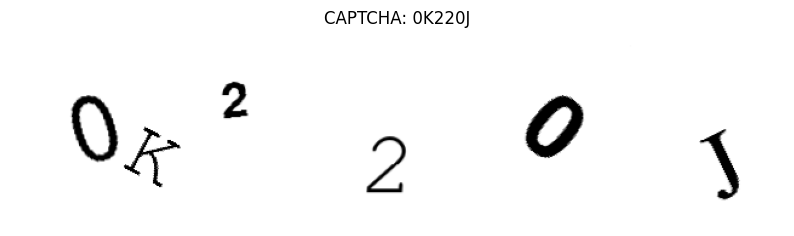

Batch image shape: torch.Size([32, 1, 160, 640])
Number of annotations for first image: 6


In [12]:
import os

# Base path to the dataset
base_path = '/home/utn/omul36yx/git/UTN-CAPTCHASOLVER/UTN-CV25-Captcha-Dataset/part2'

# Create dataloaders for each split
train_loader = get_dataloader(os.path.join(base_path, 'train'), batch_size=32, shuffle=True)
val_loader = get_dataloader(os.path.join(base_path, 'val'), batch_size=32, shuffle=False)
test_loader = get_dataloader(os.path.join(base_path, 'test'), batch_size=32, shuffle=False)

# Print dataset sizes
print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")

# Display a sample image
for batch in train_loader:
    # Display first image in batch
    img = batch['image'][0].squeeze()
    # img = img * 0.5 + 0.5  # Denormalize
    
    plt.figure(figsize=(10, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"CAPTCHA: {batch['captcha_string'][0]}")
    plt.axis('off')
    plt.show()
    
    # Print some info about the batch
    print(f"Batch image shape: {batch['image'].shape}")
    print(f"Number of annotations for first image: {len(batch['annotations'][0])}")
    break

In [1]:
import os
import json
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

class CaptchaDatasetWithBBoxes(Dataset):
    def __init__(self, data_dir, transform=None):
        """
        Args:
            data_dir (string): Direct path to the specific data folder (train, val, or test)
            transform (callable, optional): Optional transform to be applied on images
        """
        self.data_dir = data_dir
        self.images_dir = os.path.join(self.data_dir, 'images')
        self.transform = transform
        self.image_list = sorted([f for f in os.listdir(self.images_dir) if f.endswith('.png')])
        
        # Load labels if available
        self.labels_dict = {}
        labels_file = os.path.join(self.data_dir, 'labels.json')
        if os.path.exists(labels_file):
            with open(labels_file, 'r') as f:
                labels = json.load(f)
                self.labels_dict = {item['image_id']: item for item in labels}
    
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = self.image_list[idx]
        img_path = os.path.join(self.images_dir, img_name)
        
        # Load image as grayscale
        image = Image.open(img_path).convert('L')
        original_size = image.size  # (width, height)
        
        # Get image_id without extension
        image_id = os.path.splitext(img_name)[0]
        
        # Get labels if available
        label_info = self.labels_dict.get(image_id, {})
        
        # Extract captcha string and annotations
        captcha_string = label_info.get('captcha_string', '')
        annotations = label_info.get('annotations', [])
        
        # Process bounding boxes
        bboxes = []
        oriented_bboxes = []
        category_ids = []
        
        for annotation in annotations:
            # Regular bounding box [x1, y1, x2, y2]
            bbox = annotation.get('bbox', [])
            if bbox:
                bboxes.append(bbox)
            
            # Oriented bounding box [x1,y1,x2,y2,x3,y3,x4,y4]
            oriented_bbox = annotation.get('oriented_bbox', [])
            if oriented_bbox:
                oriented_bboxes.append(oriented_bbox)
            
            # Category ID (character class)
            category_id = annotation.get('category_id', -1)
            category_ids.append(category_id)
        
        # Convert to tensors
        bboxes = torch.tensor(bboxes, dtype=torch.float32) if bboxes else torch.empty((0, 4))
        oriented_bboxes = torch.tensor(oriented_bboxes, dtype=torch.float32) if oriented_bboxes else torch.empty((0, 8))
        category_ids = torch.tensor(category_ids, dtype=torch.long) if category_ids else torch.empty((0,), dtype=torch.long)
        
        # Apply transforms if specified
        if self.transform:
            image = self.transform(image)
        
        sample = {
            'image': image,
            'image_id': image_id,
            'captcha_string': captcha_string,
            'bboxes': bboxes,  # Regular bounding boxes
            'oriented_bboxes': oriented_bboxes,  # Oriented bounding boxes
            'category_ids': category_ids,  # Character category IDs
            'num_objects': len(annotations),  # Number of characters
            'original_size': original_size  # (width, height)
        }
        
        return sample

# Custom collate function for bounding boxes
def collate_fn_with_bboxes(batch):
    """Custom collate function to handle variable-length bounding boxes"""
    images = torch.stack([item['image'] for item in batch])
    image_ids = [item['image_id'] for item in batch]
    captcha_strings = [item['captcha_string'] for item in batch]
    
    # Keep bounding boxes as lists since they have variable lengths
    bboxes = [item['bboxes'] for item in batch]
    oriented_bboxes = [item['oriented_bboxes'] for item in batch]
    category_ids = [item['category_ids'] for item in batch]
    num_objects = [item['num_objects'] for item in batch]
    original_sizes = [item['original_size'] for item in batch]
    
    return {
        'image': images,
        'image_id': image_ids,
        'captcha_string': captcha_strings,
        'bboxes': bboxes,
        'oriented_bboxes': oriented_bboxes,
        'category_ids': category_ids,
        'num_objects': num_objects,
        'original_size': original_sizes
    }

# Helper function to create dataloaders with bboxes
def get_dataloader_with_bboxes(data_folder, batch_size=32, shuffle=True):
    """
    Create dataloader that includes bounding box information
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])
    
    # Create dataset
    dataset = CaptchaDatasetWithBBoxes(
        data_dir=data_folder,
        transform=transform
    )
    
    # Create dataloader with custom collate function
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=0,
        collate_fn=collate_fn_with_bboxes
    )
    
    return dataloader

# Visualization function with bounding boxes
def visualize_with_bboxes(batch, idx=0):
    """Visualize image with bounding boxes"""
    # Get image and denormalize
    img = batch['image'][idx].squeeze()
    img = img * 0.5 + 0.5  # Denormalize from [-1, 1] to [0, 1]
    
    # Get bounding boxes for this image
    bboxes = batch['bboxes'][idx]
    category_ids = batch['category_ids'][idx]
    captcha_string = batch['captcha_string'][idx]
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.imshow(img, cmap='gray')
    ax.set_title(f"CAPTCHA: {captcha_string}")
    
    # Draw bounding boxes
    for i, bbox in enumerate(bboxes):
        x1, y1, x2, y2 = bbox
        width = x2 - x1
        height = y2 - y1
        
        # Create rectangle
        rect = plt.Rectangle((x1, y1), width, height, 
                           linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Add category ID as text
        if i < len(category_ids):
            ax.text(x1, y1-5, f'ID: {category_ids[i].item()}', 
                   color='red', fontsize=10, weight='bold')
    
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"Number of characters: {len(bboxes)}")
    print(f"Bounding boxes shape: {bboxes.shape}")
    print(f"Category IDs: {category_ids.tolist()}")

Batch size: 4
Image shape: torch.Size([4, 1, 160, 640])


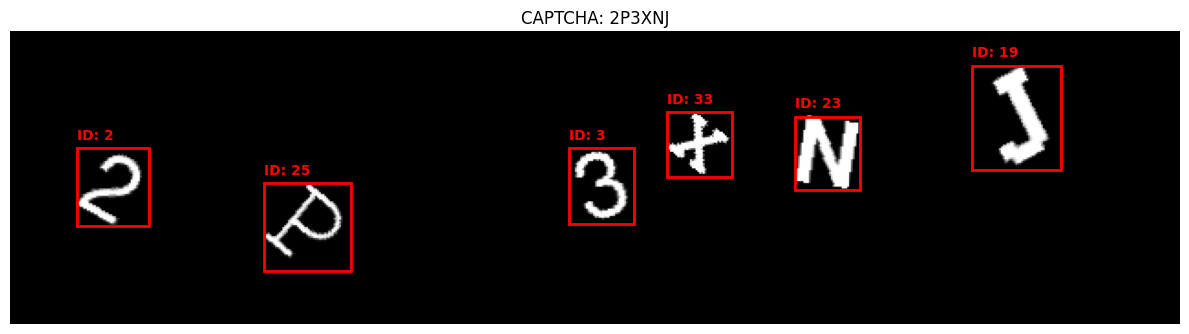

Number of characters: 6
Bounding boxes shape: torch.Size([6, 4])
Category IDs: [2, 25, 3, 33, 23, 19]
Image 0: '2P3XNJ' has 6 characters
  Bboxes shape: torch.Size([6, 4])
Image 1: 'QP76RQ' has 6 characters
  Bboxes shape: torch.Size([6, 4])
Image 2: '1E4NYBI' has 7 characters
  Bboxes shape: torch.Size([7, 4])
Image 3: 'R0U' has 3 characters
  Bboxes shape: torch.Size([3, 4])


In [4]:
import os

# Base path to the dataset
base_path = '/home/utn/omul36yx/git/UTN-CAPTCHASOLVER/UTN-CV25-Captcha-Dataset/part2'

# Create dataloaders with bounding boxes
train_loader_bbox = get_dataloader_with_bboxes(os.path.join(base_path, 'train'), batch_size=4, shuffle=True)

# Test the dataloader
for batch in train_loader_bbox:
    print(f"Batch size: {len(batch['captcha_string'])}")
    print(f"Image shape: {batch['image'].shape}")
    
    # Visualize first image with bounding boxes
    visualize_with_bboxes(batch, idx=0)
    
    # Print info about bounding boxes
    for i in range(len(batch['captcha_string'])):
        print(f"Image {i}: '{batch['captcha_string'][i]}' has {batch['num_objects'][i]} characters")
        print(f"  Bboxes shape: {batch['bboxes'][i].shape}")
    
    break